In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.datasets import load_iris, load_breast_cancer, fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
plt.style.use("ggplot")

### **GMM (EM) - PCA - LDA**

In [3]:
# Ejercicio 1

In [4]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

In [6]:
colors = ["navy", "turquoise", "darkorange"]

def make_ellipses(gmm, ax):

    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]

        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi 
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)

        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)

        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

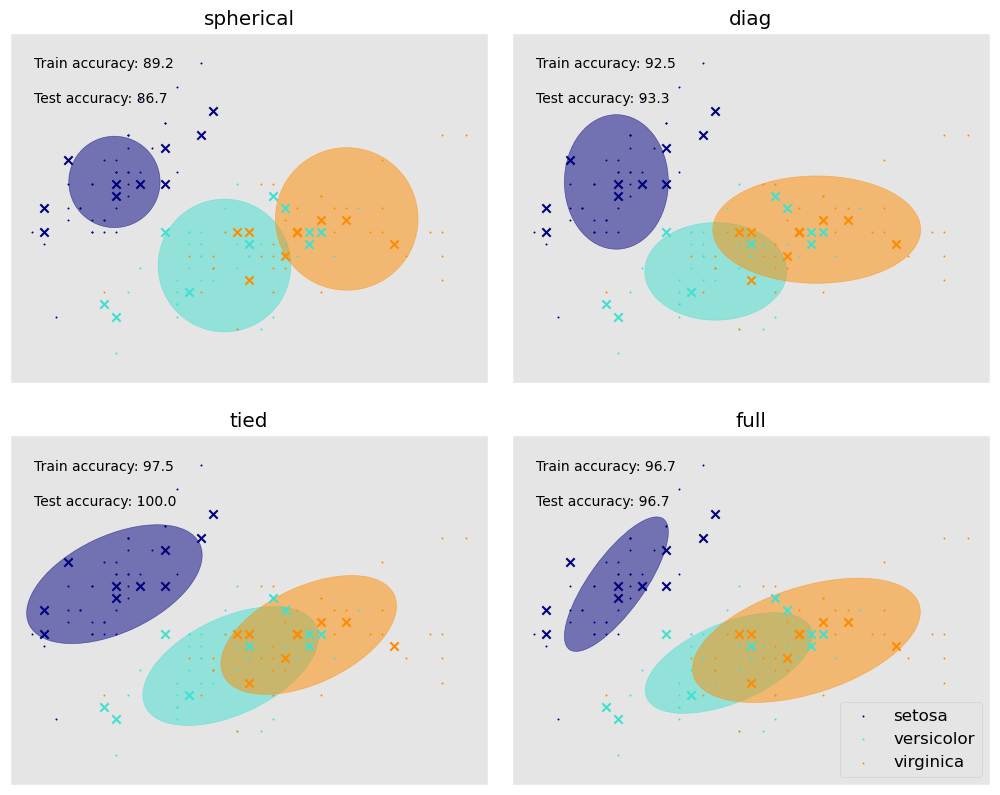

In [7]:
n_classes = len(np.unique(y_train))

estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=42
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(10, 8))
plt.subplots_adjust(bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99)

for index, (name, estimator) in enumerate(estimators.items()):
    
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)])
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color, label=iris.target_names[n])

    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))

plt.show()

In [8]:
# Ejercicio 2

In [9]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
X = iris.data
y = iris.target

target_names = iris.target_names

In [11]:
colors = ["navy", "turquoise", "darkorange"]

explained variance ratio (first two components): [0.92461872 0.05306648]


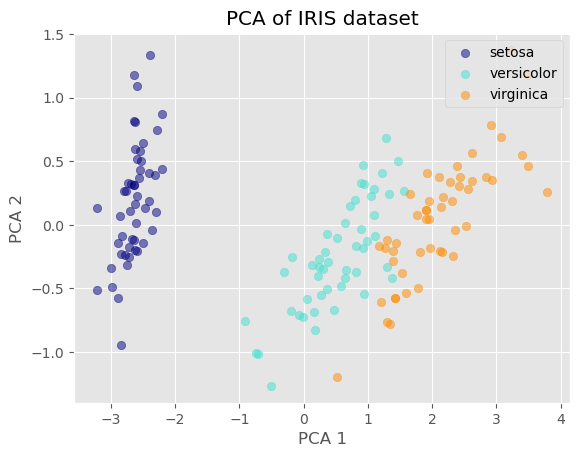

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(f"explained variance ratio (first two components): {pca.explained_variance_ratio_}")

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.5, label=target_name)

plt.title("PCA of IRIS dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.legend(loc="upper right")

plt.show()

explained variance ratio (first two components): [0.9912126 0.0087874]


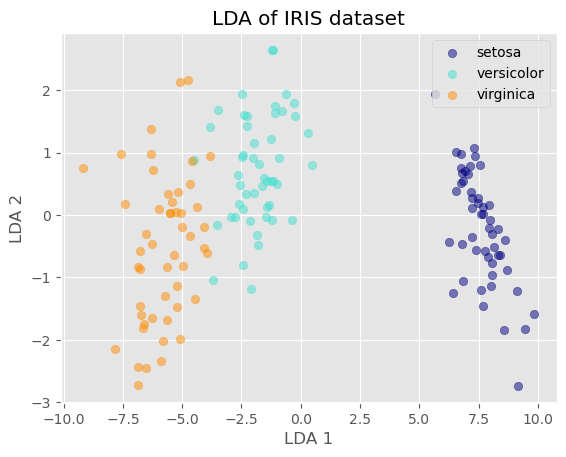

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

print(f"explained variance ratio (first two components): {lda.explained_variance_ratio_}")

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.5, label=target_name)

plt.title("LDA of IRIS dataset")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")

plt.legend(loc="upper right")

plt.show()

In [14]:
# Ejercicio 3

In [15]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

Z_train, Z_test = scaler.transform(X_train), scaler.transform(X_test)

In [18]:
pca = PCA()
pca.fit(Z_train)

pca_train, pca_test = pca.transform(Z_train), pca.transform(Z_test)

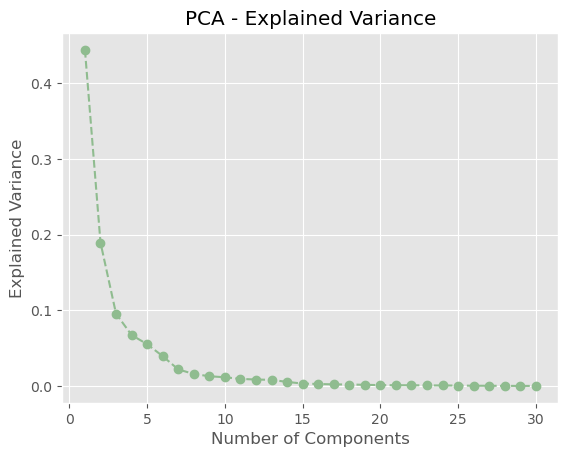

In [19]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker="o", linestyle="--", color="darkseagreen")

plt.title("PCA - Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")

plt.show()

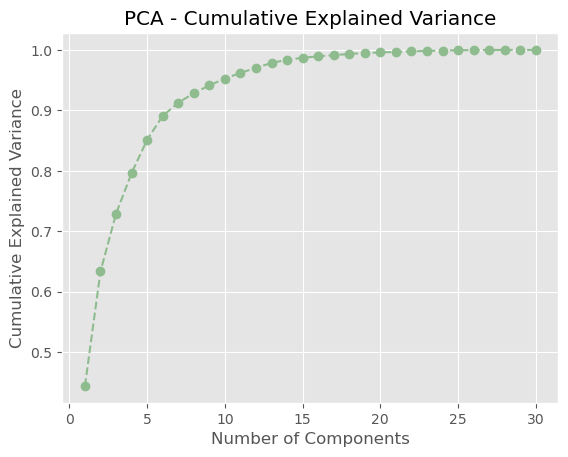

In [20]:
plt.plot(range(1, len(np.cumsum(pca.explained_variance_ratio_)) + 1), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--", color="darkseagreen")

plt.title("PCA - Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

plt.show()

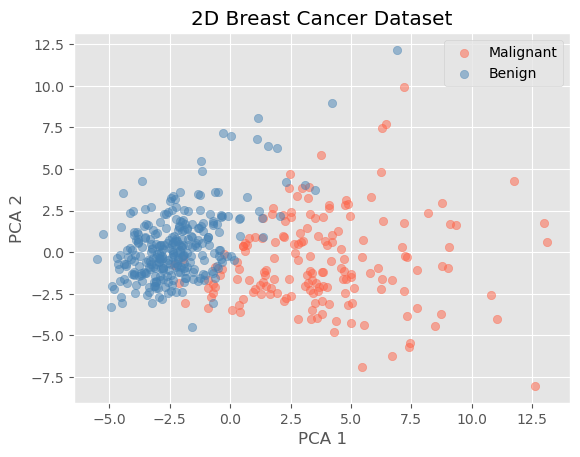

In [21]:
plt.scatter(pca_train[y_train == 0, 0], pca_train[y_train == 0, 1], color="tomato", alpha=0.5, label="Malignant")
plt.scatter(pca_train[y_train == 1, 0], pca_train[y_train == 1, 1], color="steelblue", alpha=0.5, label="Benign")

plt.title("2D Breast Cancer Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.legend()

plt.show()

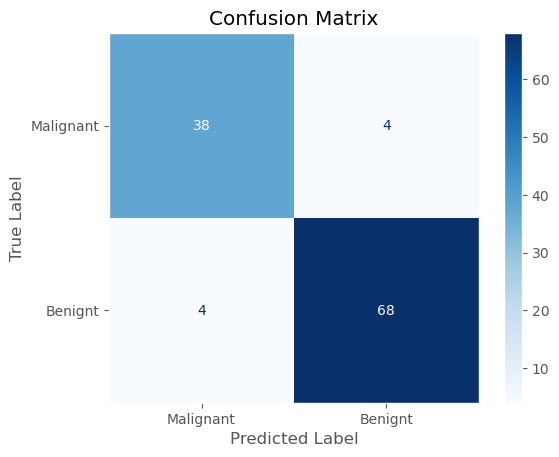

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [22]:
clf = GaussianNB()
clf.fit(Z_train, y_train)

y_pred = clf.predict(Z_test)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benignt"])
cm.plot(cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))

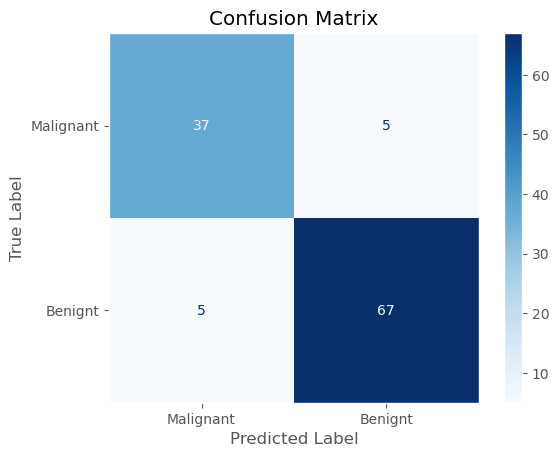

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        42
           1       0.93      0.93      0.93        72

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [23]:
clf = GaussianNB()
clf.fit(pca_train[:, :2], y_train)

y_pred = clf.predict(pca_test[:, :2])

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benignt"])
cm.plot(cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))

In [24]:
# Ejercicio 4

In [25]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [26]:
X = faces.data
y = faces.target

In [27]:
(n_samples, n_features), n_classes = X.shape, np.unique(y).size
print(f"# classes: {n_classes}; # samples: {n_samples}; # features {n_features}")

# classes: 8; # samples: 1348; # features 2914


In [28]:
target_names = faces.target_names
h, w = faces.images.shape[1], faces.images.shape[2]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42, stratify=y
)

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

Z_train, Z_test = scaler.transform(X_train), scaler.transform(X_test)

In [31]:
n_components=150

pca = PCA(n_components, svd_solver="randomized", whiten=True)
pca.fit(Z_train)

pca_train, pca_test = pca.transform(Z_train), pca.transform(Z_test)

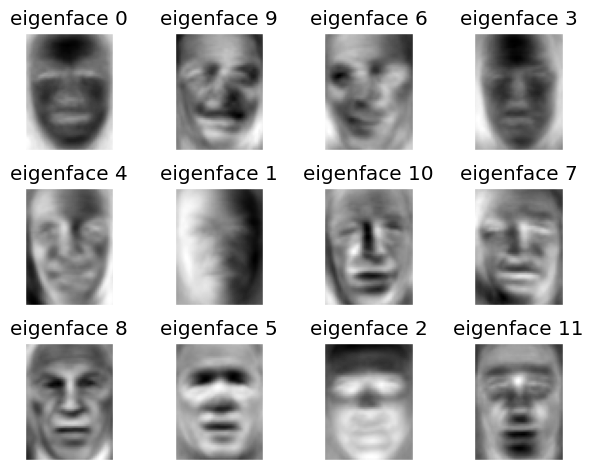

In [32]:
eigenfaces = pca.components_.reshape((n_components, h, w))

nrows, ncols = 3, 4
fig, ax = plt.subplots(nrows, ncols)
for i in range(nrows * ncols):
    row = i % nrows
    col = i % ncols
    ax[row, col].imshow(eigenfaces[i], cmap=plt.cm.gray)
    ax[row, col].set_title(f"eigenface {i}")
    ax[row, col].set_xticks(())
    ax[row, col].set_yticks(())
plt.tight_layout()
plt.show()

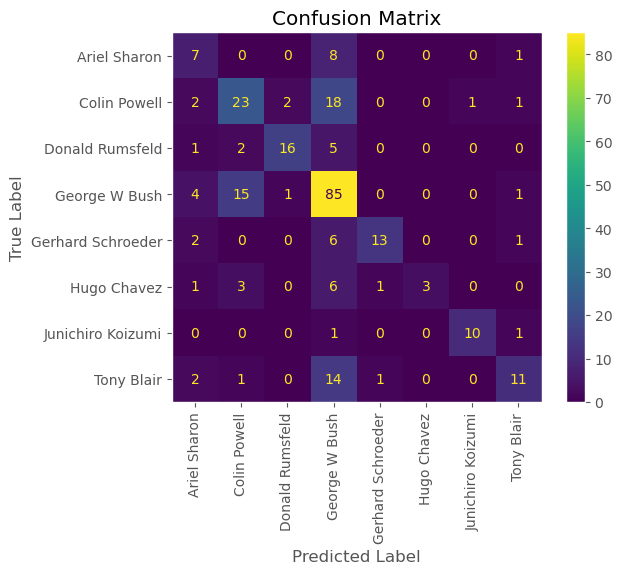

                   precision    recall  f1-score   support

     Ariel Sharon       0.37      0.44      0.40        16
     Colin Powell       0.52      0.49      0.51        47
  Donald Rumsfeld       0.84      0.67      0.74        24
    George W Bush       0.59      0.80      0.68       106
Gerhard Schroeder       0.87      0.59      0.70        22
      Hugo Chavez       1.00      0.21      0.35        14
Junichiro Koizumi       0.91      0.83      0.87        12
       Tony Blair       0.69      0.38      0.49        29

         accuracy                           0.62       270
        macro avg       0.72      0.55      0.59       270
     weighted avg       0.66      0.62      0.61       270



In [33]:
clf = GaussianNB()
clf.fit(pca_train, y_train)

y_pred = clf.predict(pca_test)

cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
cm.plot(xticks_rotation="vertical")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred, target_names=target_names))

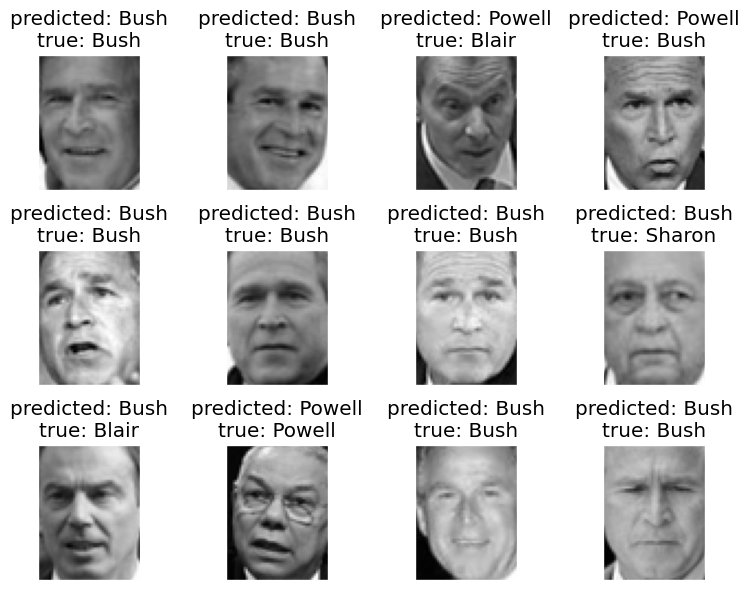

In [34]:
nrows, ncols = 3, 4
fig, ax = plt.subplots(nrows, ncols, figsize=(8, 6))
for i in range(nrows * ncols):
    row = i % nrows
    col = i % ncols
    ax[row, col].imshow(X_test[i].reshape((h, w)), cmap=plt.cm.gray)
    ax[row, col].set_title(
        f"predicted: {target_names[y_pred[i]].split()[-1]}\n"
        f"true: {target_names[y_test[i]].split()[-1]}"
    )
    ax[row, col].set_xticks(())
    ax[row, col].set_yticks(())
plt.tight_layout()
plt.show()